<a href="https://colab.research.google.com/github/roshank1605A04/Student-s-Performance-Analytics/blob/master/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("C:\code projects\Students-Performance-Analytics\StudentsPerformance.csv")

print(df.shape)

df.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [79]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [81]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [82]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

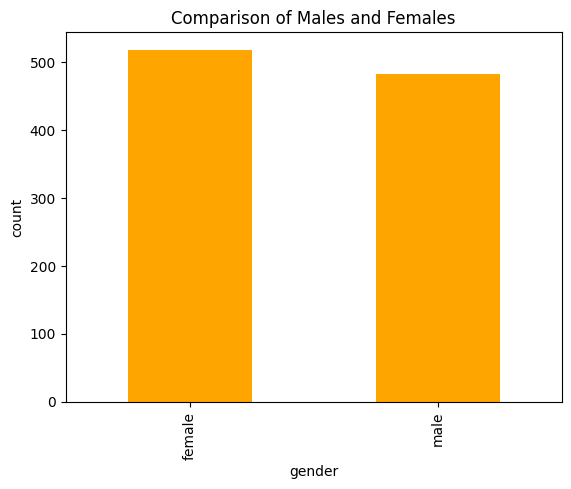

In [111]:
# comparing the number of male and female

df['gender'].value_counts(normalize = True)
df['gender'].value_counts(dropna = False).plot.bar(color = 'orange')
plt.title('Comparison of Males and Females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

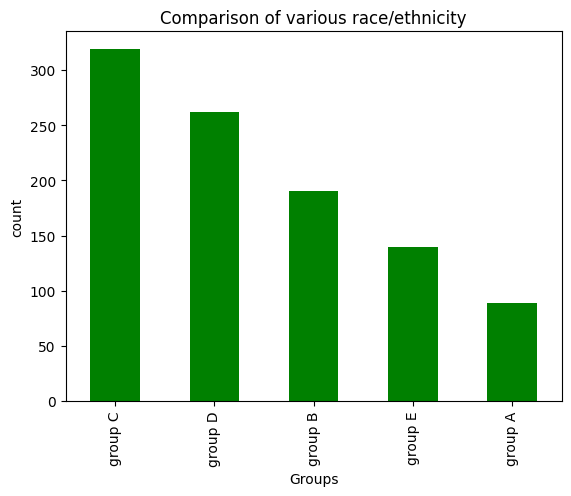

In [112]:
# comparing the different race/etnicity 

df['race/ethnicity'].value_counts(normalize = True)
df['race/ethnicity'].value_counts(dropna = False).plot.bar(color = 'green')
plt.title('Comparison of various race/ethnicity')
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

In [85]:
#count of people belonging to different race/ethnicity
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

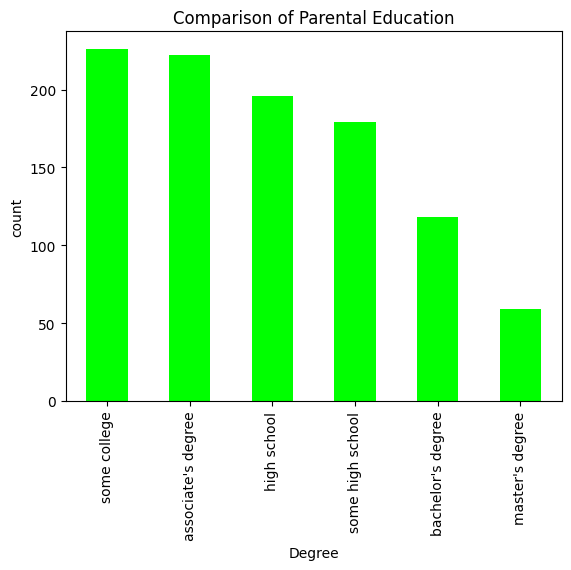

In [113]:
# comparing the different parental education levels

df['parental level of education'].value_counts(normalize = True)
df['parental level of education'].value_counts(dropna = False).plot.bar(color= 'lime')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

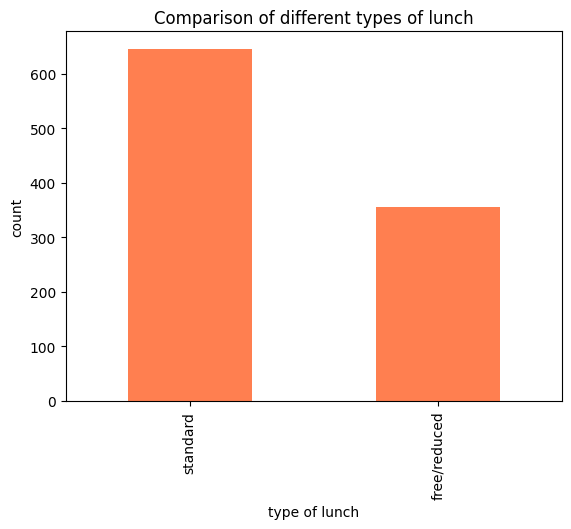

In [88]:
# visualizing different types of lunch 

df['lunch'].value_counts(normalize = True)
df['lunch'].value_counts(dropna = False).plot.bar(color = 'coral')
plt.title('Comparison of different types of lunch')
plt.xlabel('type of lunch')
plt.ylabel('count')
plt.show()

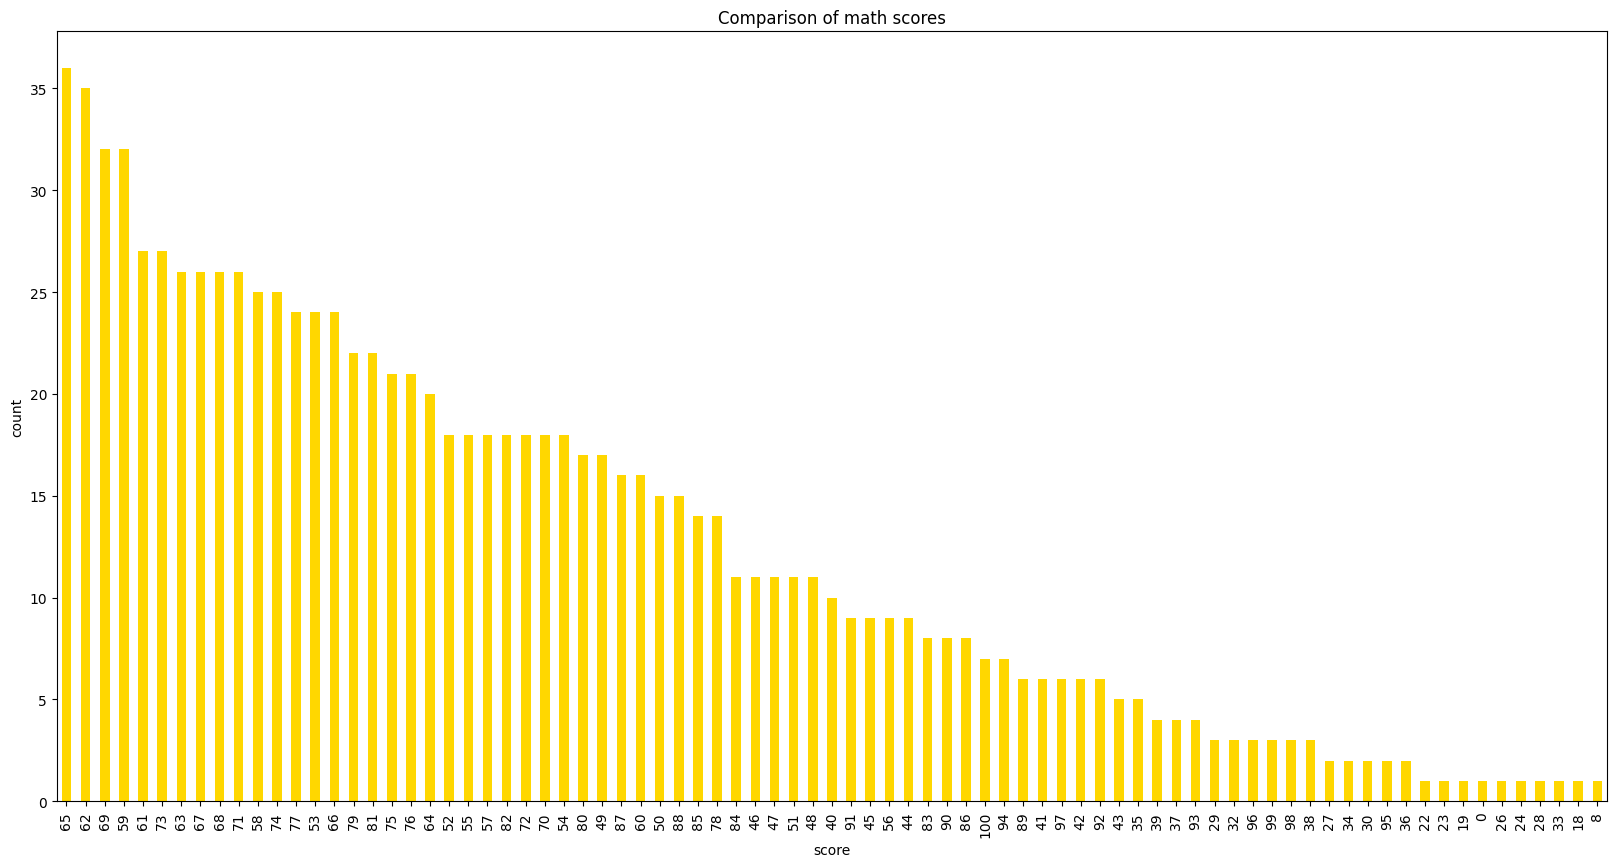

In [89]:
# visualizing scores in maths

df['math score'].value_counts(normalize = True)
df['math score'].value_counts(dropna = False).plot.bar(figsize = (20, 10), color= 'gold')
plt.title('Comparison of math scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

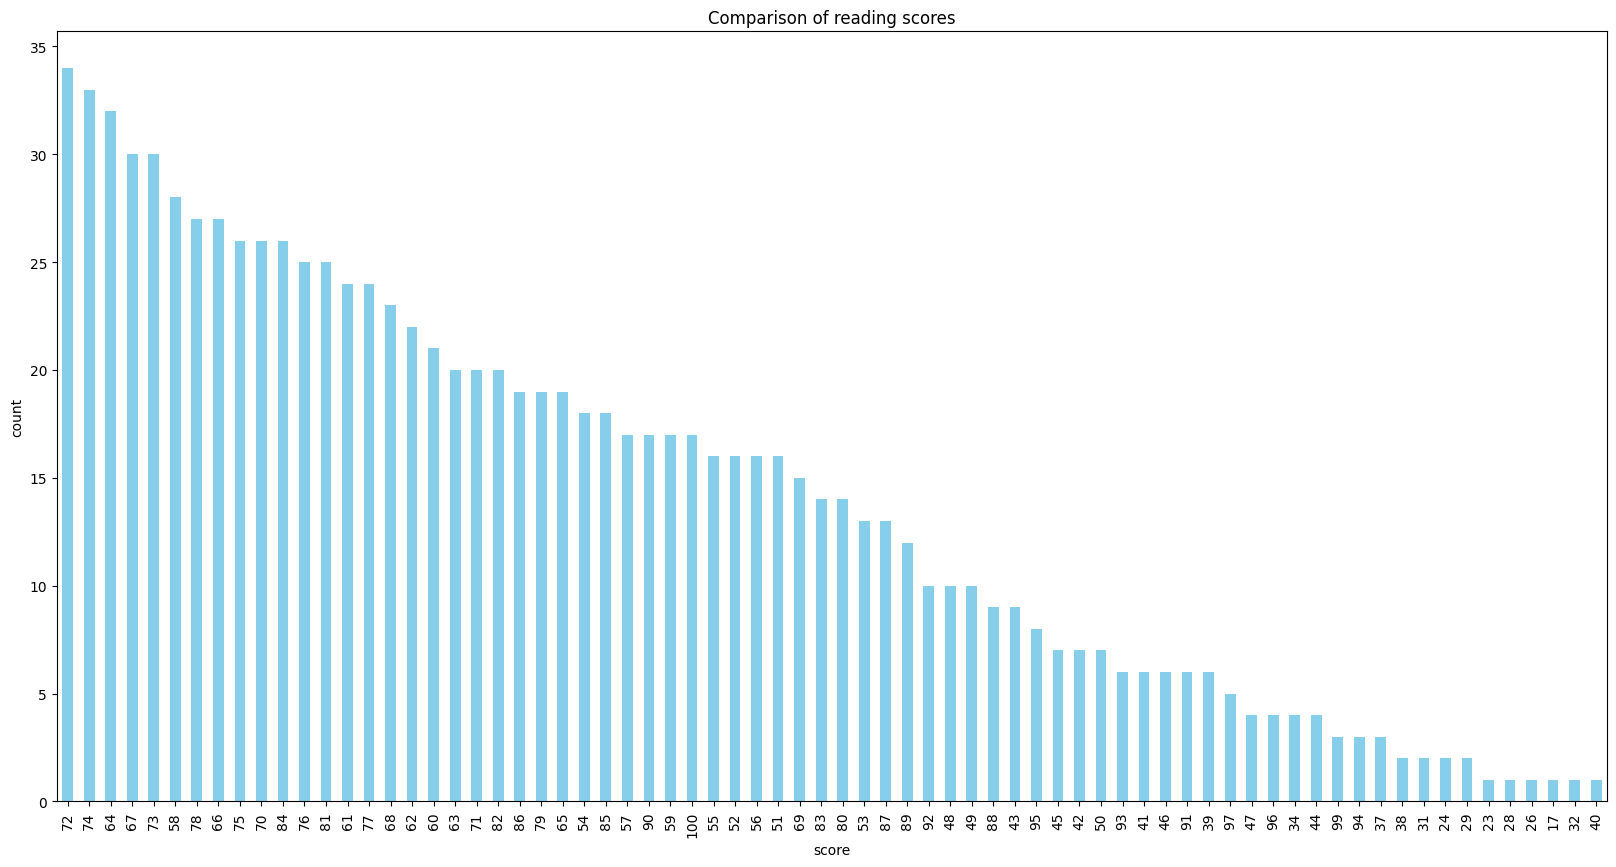

In [90]:
# visualizing reading score score

df['reading score'].value_counts(normalize = True)
df['reading score'].value_counts(dropna = False).plot.bar(figsize = (20, 10), color = 'skyblue')
plt.title('Comparison of reading scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

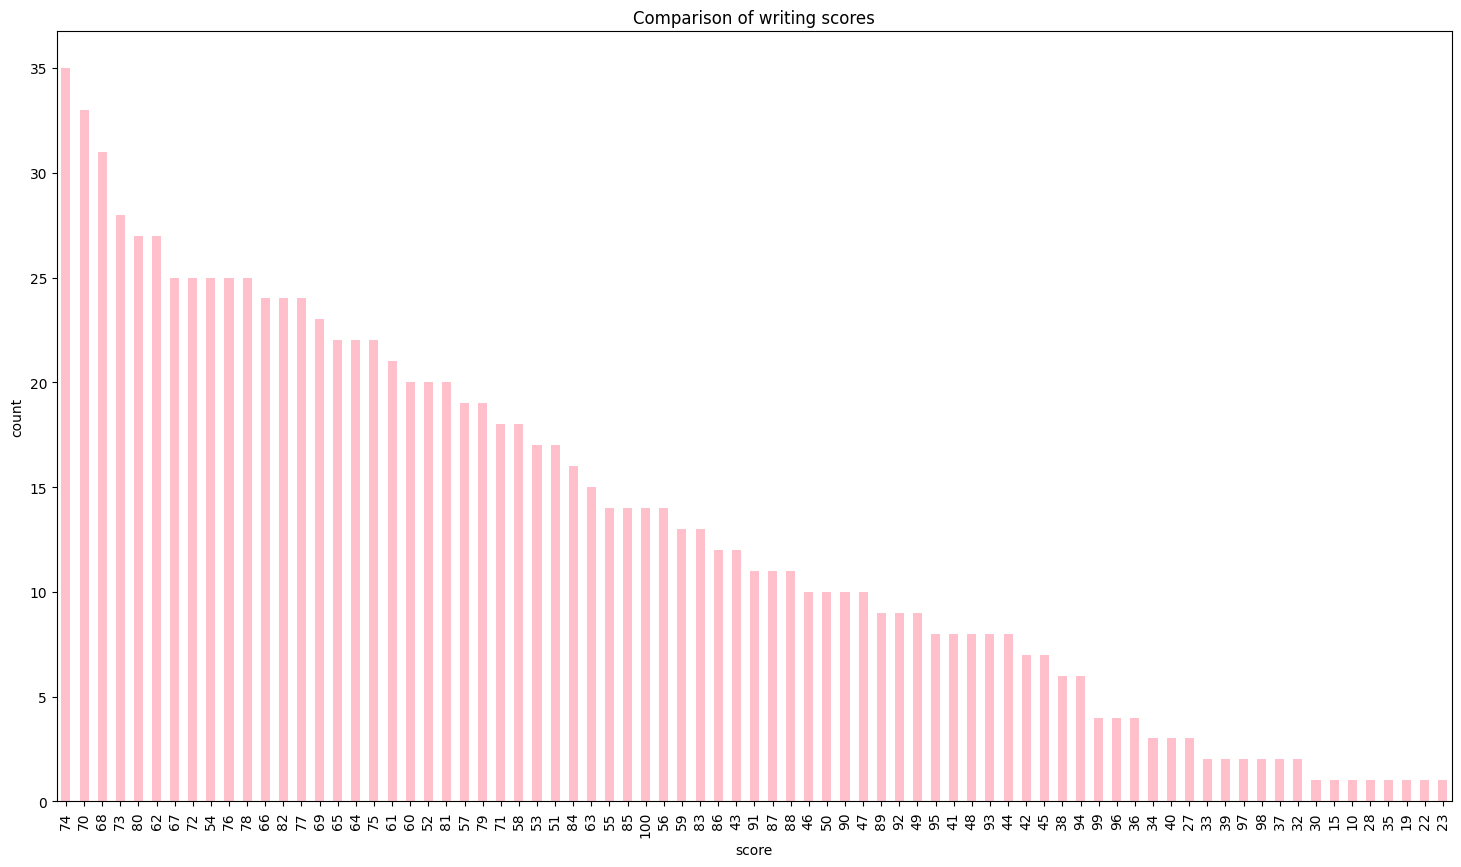

In [91]:
# visualizing writing score

df['writing score'].value_counts(normalize = True)
df['writing score'].value_counts(dropna = False).plot.bar(figsize = (18, 10), color = 'pink')
plt.title('Comparison of writing scores')
plt.xlabel('score')
plt.ylabel('count')
plt.show()

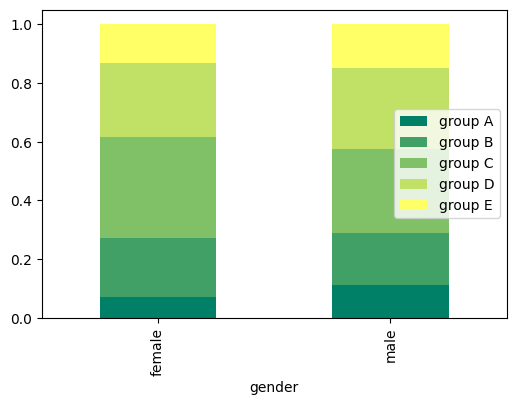

In [114]:
# comparison of gender and race/etnicity 

x = pd.crosstab(df['gender'], df['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (6,4), cmap= 'summer')
plt.legend(loc ='right')

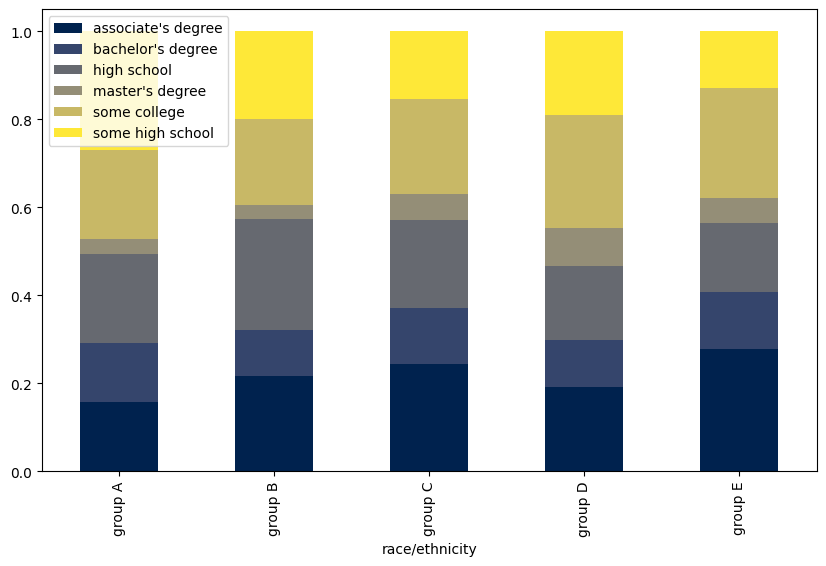

In [115]:
# comparison of race/ethnicity and parental degree

x = pd.crosstab(df['race/ethnicity'], df['parental level of education'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = 'True', figsize = (10,6), cmap='cividis' )
plt.legend(loc ='best')

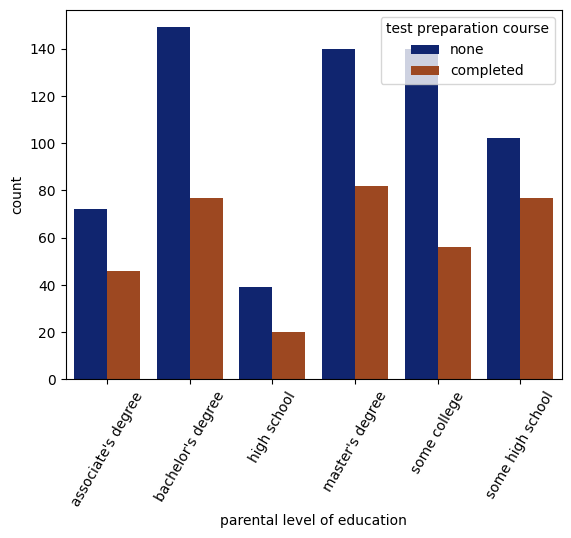

In [116]:
# comparison of parental degree and test prep course

g = sns.countplot(x = 'parental level of education', data = df, hue = 'test preparation course', palette = 'dark')
g.set_xticklabels(labels = x , rotation = 60)
plt.show()

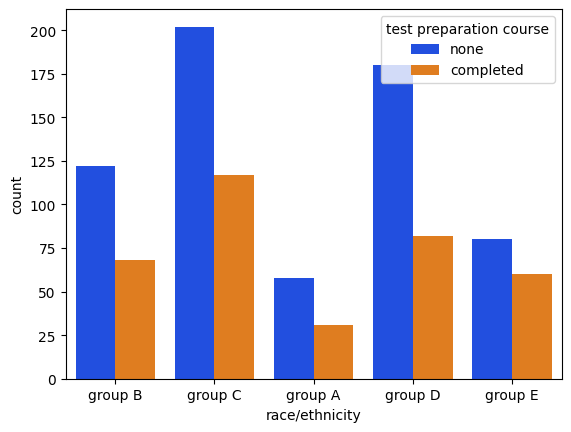

In [117]:
# comparison of race/ethnicity and test preparation course

sns.countplot(x = 'race/ethnicity', data = df,  hue = 'test preparation course', palette = 'bright')
plt.show()

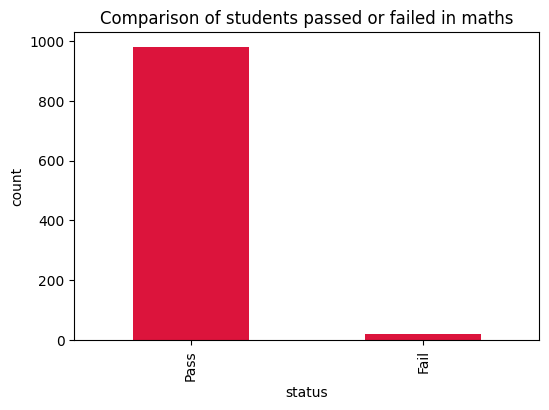

In [118]:
# feature engineering on the data to visualize and solve the dataset more accurately

# setting a passing mark for the students to pass on the three subjects individually
passmarks = 33

# creating a new column pass_math, which tells us whether the students are pass or fail in math
df['pass_math'] = np.where(df['math score']< passmarks, 'Fail', 'Pass')
df['pass_math'].value_counts(dropna = False).plot.bar(color = 'crimson', figsize = (6, 4))

plt.title('Comparison of students passed or failed in maths')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [119]:
df['pass_math'].value_counts()

Pass    981
Fail     19
Name: pass_math, dtype: int64

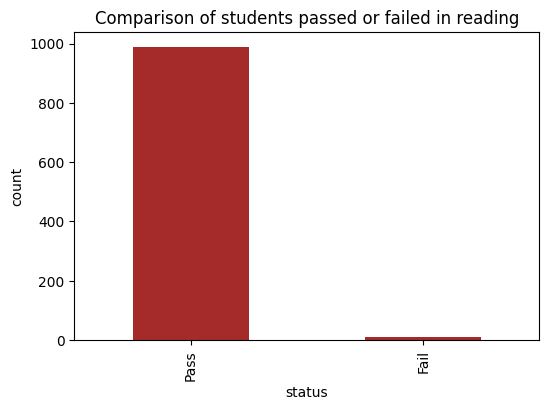

In [120]:
# creating a new column pass_reading, which tells us whether the students are pass or fail in reading
df['pass_reading'] = np.where(df['reading score']< passmarks, 'Fail', 'Pass')
df['pass_reading'].value_counts(dropna = False).plot.bar(color = 'brown', figsize = (6,4))

plt.title('Comparison of students passed or failed in reading')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [121]:
df['pass_reading'].value_counts(dropna = False)

Pass    989
Fail     11
Name: pass_reading, dtype: int64

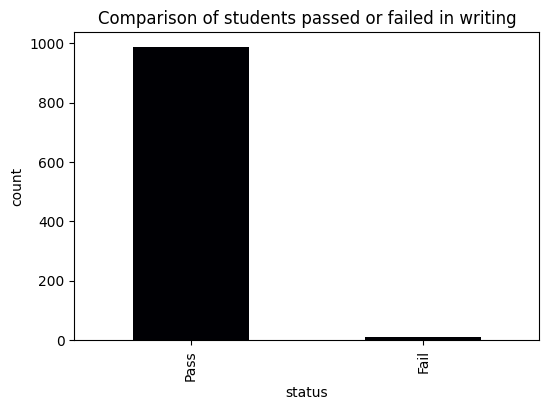

In [122]:
# creating a new column pass_writing, which tell us whether the students are pass or fail in writing
df['pass_writing'] = np.where(df['writing score']< passmarks, 'Fail', 'Pass')
df['pass_writing'].value_counts(dropna = False).plot.bar(colormap = 'magma', figsize = (6,4))

plt.title('Comparison of students passed or failed in writing')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [101]:
df['pass_writing'].value_counts(dropna = False)

Pass    988
Fail     12
Name: pass_writing, dtype: int64

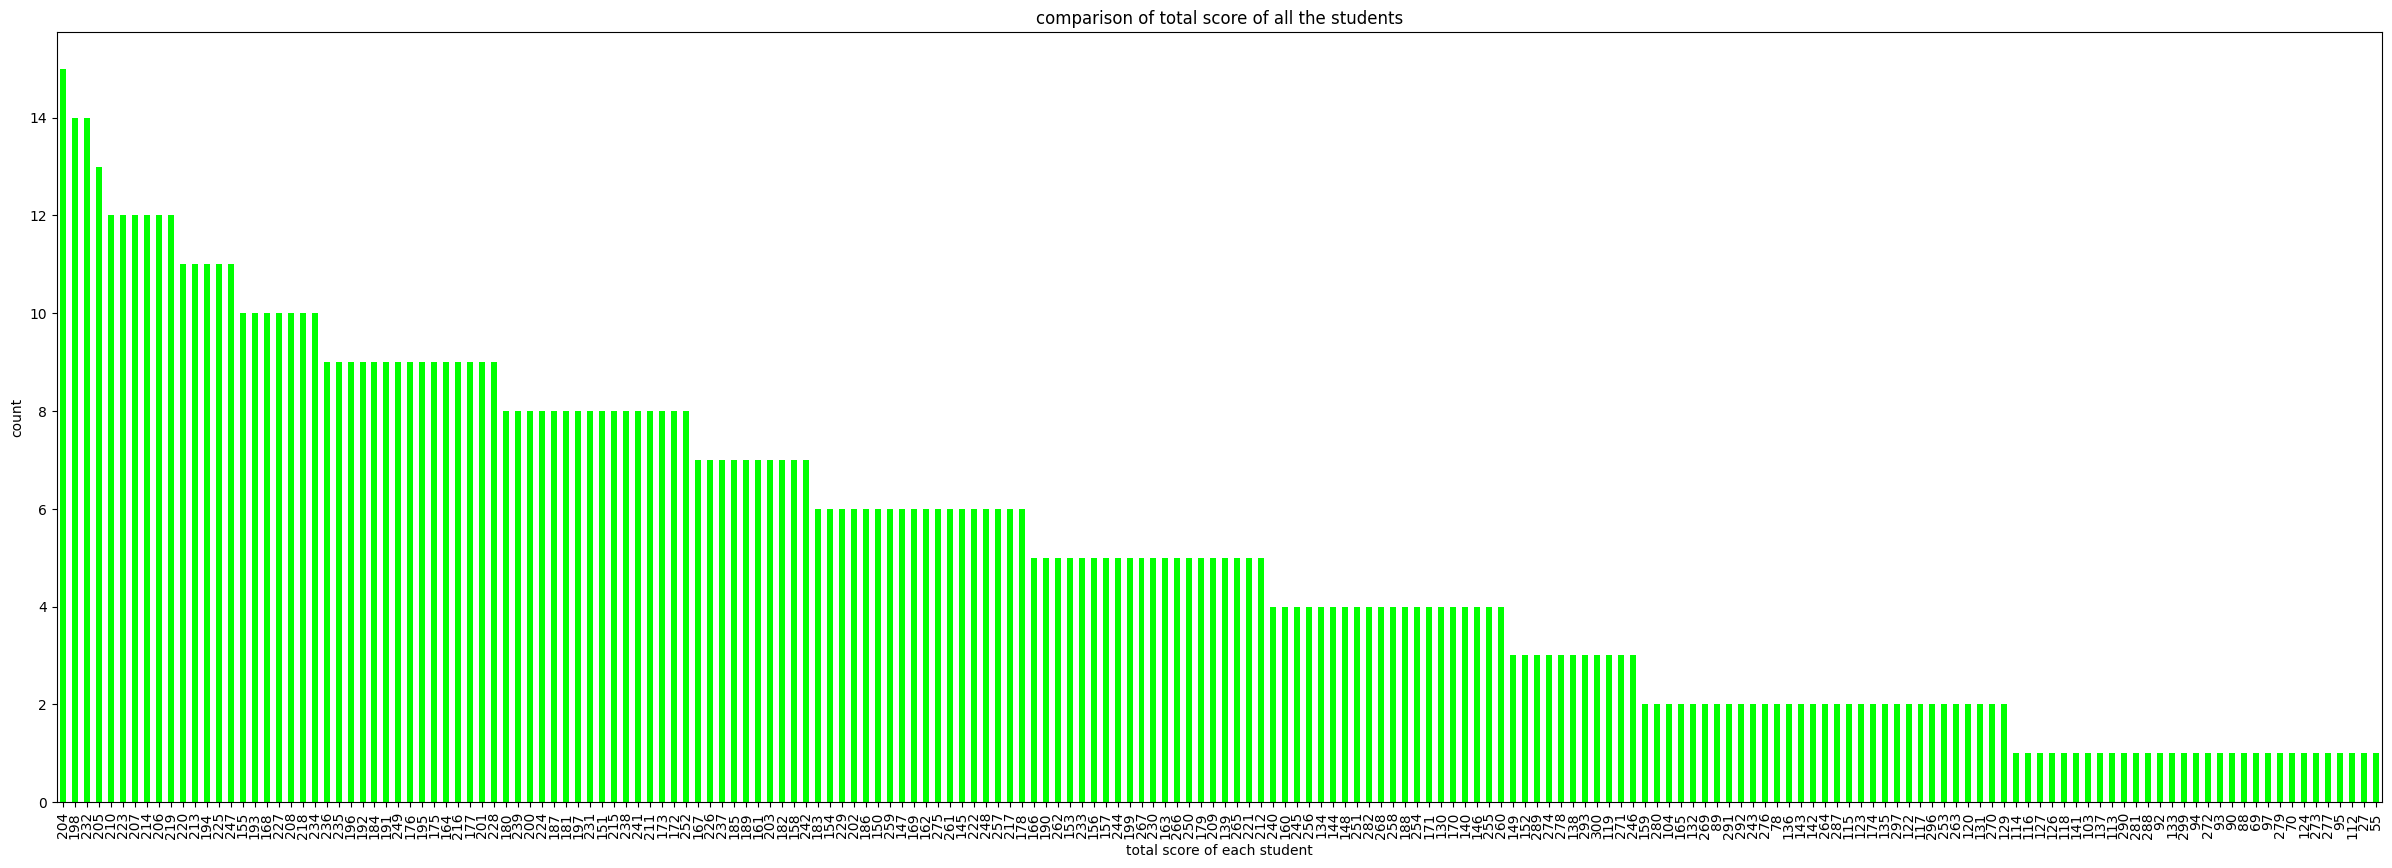

In [123]:
# computing the total score for each student

df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

df['total_score'].value_counts(normalize = True)
df['total_score'].value_counts(dropna = True).plot.bar(color = 'lime', figsize = (30, 10))

plt.title('comparison of total score of all the students')
plt.xlabel('total score of each student')
plt.ylabel('count')
plt.show()

C:\Users\YASH\AppData\Local\Temp\ipykernel_11792\2776082829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percentage'][i] = ceil(df['percentage'][i])


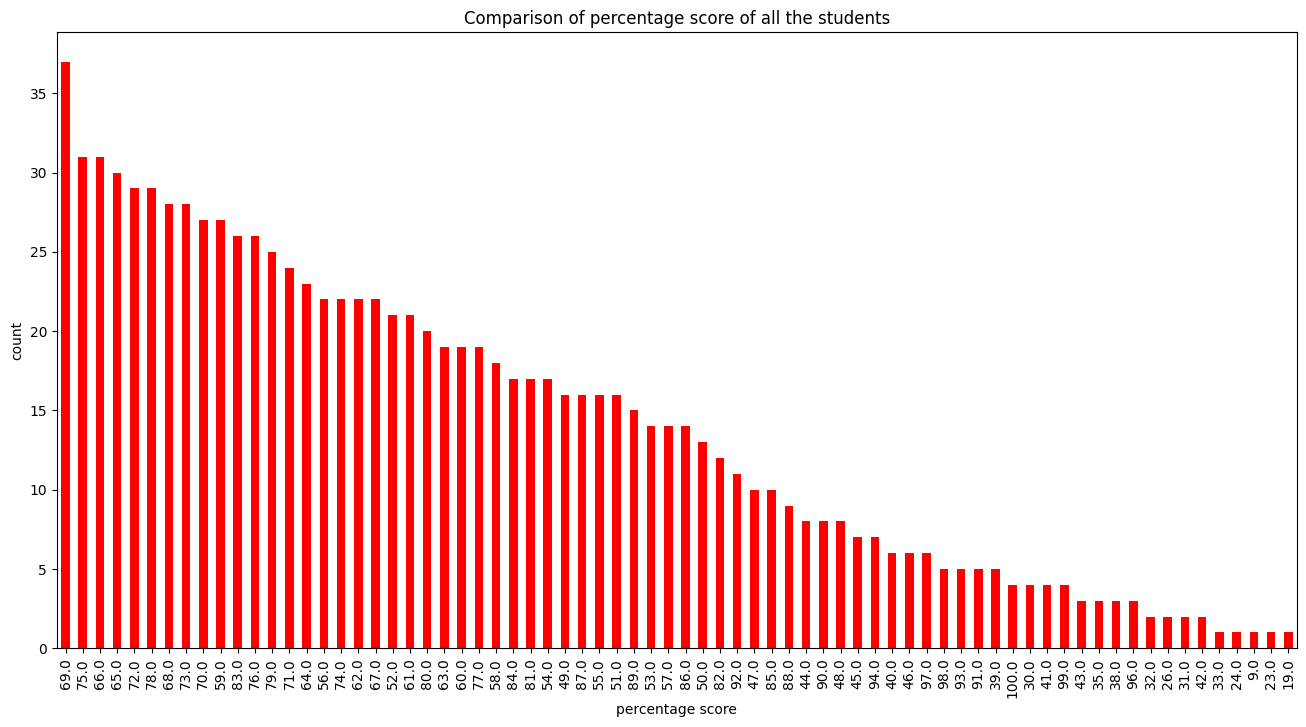

In [124]:
# computing percentage for each of the students
# importing math library to use ceil
from math import * 

df['percentage'] = df['total_score']/3

for i in range(0, 1000):
  df['percentage'][i] = ceil(df['percentage'][i])

df['percentage'].value_counts(normalize = True)
df['percentage'].value_counts(dropna = False).plot.bar(figsize = (16, 8), color = 'red')

plt.title('Comparison of percentage score of all the students')
plt.xlabel('percentage score')
plt.ylabel('count')
plt.show()

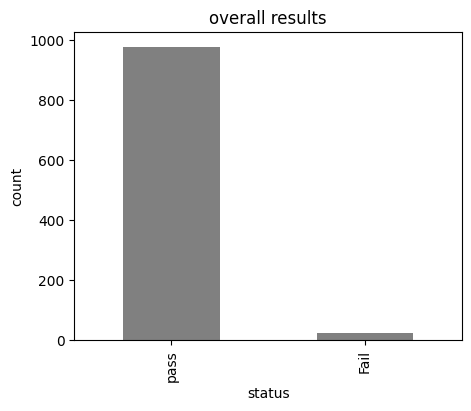

In [125]:
# checking which student is fail overall

df['status'] = df.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

df['status'].value_counts(dropna = False).plot.bar(color = 'gray', figsize = (5,4))
plt.title('overall results')
plt.xlabel('status')
plt.ylabel('count')
plt.show()

In [126]:
# Assigning grades to the grades according to the following criteria :
# 0  - 32 marks : grade E
# 33 - 50 marks : grade D
# 51 - 70 marks : grade C
# 71 - 80 marks : grade B
# 81 - 90 marks : grade A
# 91 - 100 marks : grade O

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 91):
    return 'O'
  if(percentage >= 81):
    return 'A'
  if(percentage >= 71):
    return 'B'
  if(percentage >= 51):
    return 'C'
  if(percentage >= 33):
    return 'D'
  else :
    return 'E'

df['grades'] = df.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

df['grades'].value_counts()

C    444
B    253
A    144
D     87
O     50
E     22
Name: grades, dtype: int64

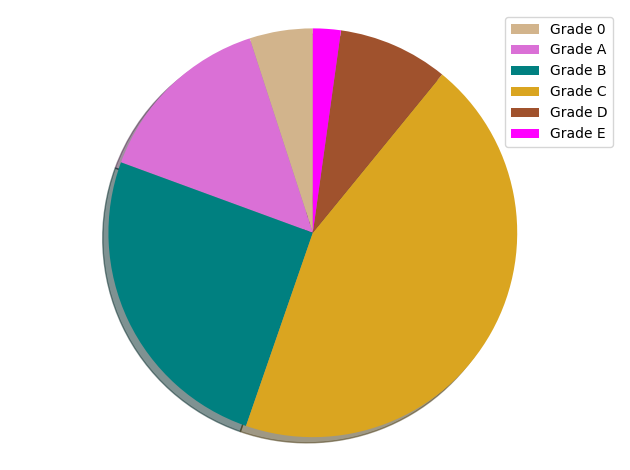

In [127]:
# plotting a pie chart for the distribution of various grades amongst the students

labels = ['Grade 0', 'Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E']
sizes = [50, 144, 253, 444, 87, 22]
colors = ['tan', 'orchid', 'teal', 'goldenrod', 'sienna', 'fuchsia']
explode = (0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001)

patches, texts = plt.pie(sizes, colors = colors, shadow=True, startangle=90)
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='parental level of education'>

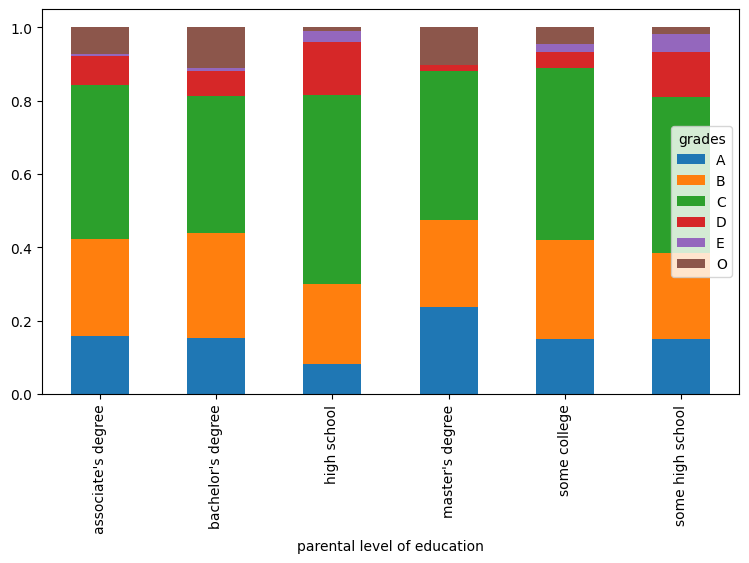

In [128]:
# comparison parent's degree and their corresponding grades

x = pd.crosstab(df['parental level of education'], df['grades'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (9, 5))

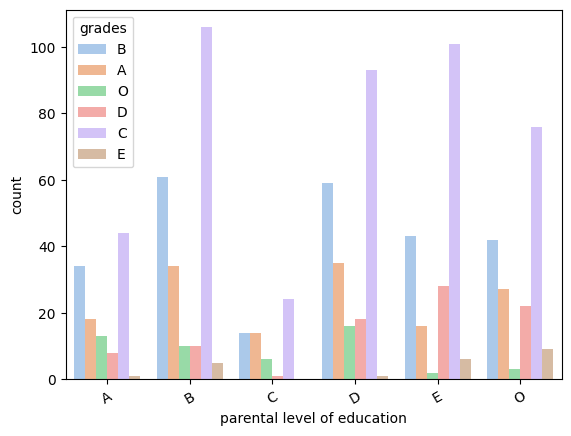

In [131]:
# for better visualization we will plot it again using seaborn

g= sns.countplot(x = df['parental level of education'], data = df, hue = df['grades'], palette = 'pastel')
plt.show()

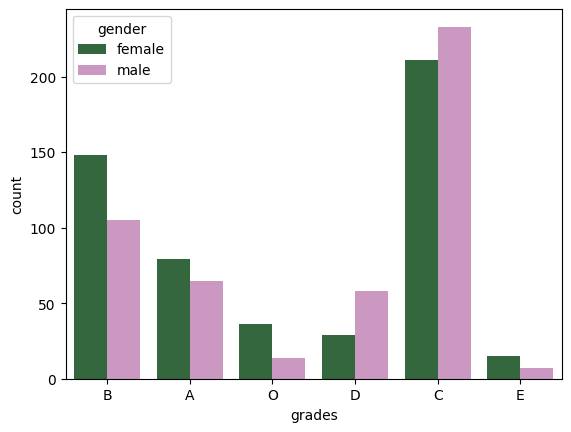

In [133]:
# comparing the distribution of grades among males and females

sns.countplot(x = df['grades'], data = df, hue = df['gender'], palette = 'cubehelix')
#sns.palplot(sns.dark_palette('purple'))
plt.show()

In [132]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,73.0,pass,B
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,83.0,pass,A
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,93.0,pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,50.0,pass,D
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,77.0,pass,B


In [134]:
df.describe()

,math score,reading score,writing score,total_score,percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,68.105000
std,15.16308,14.600192,15.195657,42.771978,14.258095
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,59.000000
50%,66.00000,70.000000,69.000000,205.000000,69.000000
75%,77.00000,79.000000,79.000000,233.000000,78.000000
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [135]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
df['test preparation course'] = le.fit_transform(df['test preparation course'])
df['test preparation course'].value_counts()

1    642
0    358
Name: test preparation course, dtype: int64

In [136]:
# label encoding for lunch

df['lunch'] = le.fit_transform(df['lunch'])
df['lunch'].value_counts()

1    645
0    355
Name: lunch, dtype: int64

In [138]:
# label encoding for race/ethnicity
# we have to map values to each of the categories

df['race/ethnicity'] = df['race/ethnicity'].replace('group A', 1)
df['race/ethnicity'] = df['race/ethnicity'].replace('group B', 2)
df['race/ethnicity'] = df['race/ethnicity'].replace('group C', 3)
df['race/ethnicity'] = df['race/ethnicity'].replace('group D', 4)
df['race/ethnicity'] = df['race/ethnicity'].replace('group E', 5)

df['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [139]:
# label encoding for parental level of education

df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['parental level of education'].value_counts()

4    226
0    222
2    196
5    179
1    118
3     59
Name: parental level of education, dtype: int64

In [140]:
# label encoding for gender

df['gender'] = le.fit_transform(df['gender'])
df['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [141]:
# label encoding for pass_math

df['pass_math'] = le.fit_transform(df['pass_math'])
df['pass_math'].value_counts()

1    981
0     19
Name: pass_math, dtype: int64

In [142]:
# label encoding for pass_reading

df['pass_reading'] = le.fit_transform(df['pass_reading'])
df['pass_reading'].value_counts()

1    989
0     11
Name: pass_reading, dtype: int64

In [143]:
# label encoding for pass_writing

df['pass_writing'] = le.fit_transform(df['pass_writing'])
df['pass_writing'].value_counts()

1    988
0     12
Name: pass_writing, dtype: int64

In [144]:
# label encoding for status

df['status'] = le.fit_transform(df['status'])
df['status'].value_counts()

1    978
0     22
Name: status, dtype: int64

In [145]:
# label encoding for grades
# we have to map values to each of the categories

df['grades'] = df['grades'].replace('O', 0)
df['grades'] = df['grades'].replace('A', 1)
df['grades'] = df['grades'].replace('B', 2)
df['grades'] = df['grades'].replace('C', 3)
df['grades'] = df['grades'].replace('D', 4)
df['grades'] = df['grades'].replace('E', 5)

df['race/ethnicity'].value_counts()

3    319
4    262
2    190
5    140
1     89
Name: race/ethnicity, dtype: int64

In [146]:
df.shape

(1000, 15)

In [147]:
# splitting the dependent and independent variables

x = df.iloc[:,:14]
y = df.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [148]:
# splitting the dfset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [149]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


In [150]:
# applying principal components analysis

from sklearn.decomposition import PCA

# creating a principal component analysis model
#pca = PCA(n_components = None)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

# visualising the principal components that will explain the highest share of variance
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

# creating a principal component analysis model
#pca = PCA(n_components = 2)

# feeding the independent variables to the PCA model
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

**Modelling**

**Logistic Regression**

In [151]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training df to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.804
Testing Accuracy : 0.796


c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[  2   8   0   0   0   0]
 [  0  18   8   0   0   0]
 [  0   0  55  14   0   0]
 [  0   0   1 112   0   0]
 [  0   0   0  19   6   0]
 [  0   0   0   0   1   6]]


**Random Forest**

In [153]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training df to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.996


In [154]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 10   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0  69   0   0   0]
 [  0   0   0 113   0   0]
 [  0   0   0   0  25   0]
 [  0   0   0   0   1   6]]


In [155]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())

c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 15 members, which is less than n_splits=20.
  warnings.warn(


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean accuracy : 1.0
mean standard variance : 0.0


**Decision Forest**

In [156]:
from sklearn.tree import DecisionTreeClassifier

# creating a model
model = DecisionTreeClassifier()

# feeding the training df to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [157]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[ 10   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0  69   0   0   0]
 [  0   0   0 113   0   0]
 [  0   0   0   0  25   0]
 [  0   0   0   0   0   7]]


In [158]:
# k fold cross validation 

from sklearn.model_selection import cross_val_score

# computing accuracies for 20 different model's accuracy
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 20)
print(accuracies)

# computing mean of accuaracies obtained by all the models
print("mean accuracy :", accuracies.mean())

# computing the standard variance of the models
print("mean standard variance :", accuracies.std())
   

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.97297297 1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
mean accuracy : 0.9986486486486486
mean standard variance : 0.005890403977757656


c:\Users\YASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 15 members, which is less than n_splits=20.
  warnings.warn(


**Support Vector Machine**

In [159]:
from sklearn.svm import SVC

# creating a model
model = SVC()

# feeding the training df to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9106666666666666
Testing Accuracy : 0.868


In [160]:
# printing the confusion matrix

from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
print(cm)

[[  3   7   0   0   0   0]
 [  0  21   5   0   0   0]
 [  0   1  64   4   0   0]
 [  0   0   1 112   0   0]
 [  0   0   0  15  10   0]
 [  0   0   0   0   0   7]]
